# Task 3

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

plt.style.use("ggplot")
plt.rcParams.update(
    {"font.size": 16, "axes.labelweight": "bold", "figure.figsize": (8, 6)}
)
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [2]:
## Depending on the permissions that you provided to your bucket you might need to provide your aws credentials
## to read from the bucket, if so provide with your credentials and pass as storage_options=aws_credentials
# aws_credentials = {"key": "","secret": "","token":""}
df = pd.read_csv("s3://mds-s3-25/output/ml_data_SYD.csv", index_col=0, parse_dates=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46020 entries, 1889-01-01 to 2014-12-31
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ACCESS-CM2_rainfall        46020 non-null  float64
 1   ACCESS-ESM1-5_rainfall     46020 non-null  float64
 2   AWI-ESM-1-1-LR_rainfall    46020 non-null  float64
 3   BCC-CSM2-MR_rainfall       45990 non-null  float64
 4   BCC-ESM1_rainfall          45990 non-null  float64
 5   CMCC-CM2-HR4_rainfall      45990 non-null  float64
 6   CMCC-CM2-SR5_rainfall      45990 non-null  float64
 7   CMCC-ESM2_rainfall         45990 non-null  float64
 8   CanESM5_rainfall           45990 non-null  float64
 9   EC-Earth3-Veg-LR_rainfall  46020 non-null  float64
 10  FGOALS-g3_rainfall         45990 non-null  float64
 11  GFDL-CM4_rainfall          45990 non-null  float64
 12  INM-CM4-8_rainfall         45990 non-null  float64
 13  INM-CM5-0_rainfall         45

In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45989 entries, 1889-01-01 to 2014-12-31
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ACCESS-CM2_rainfall        45989 non-null  float64
 1   ACCESS-ESM1-5_rainfall     45989 non-null  float64
 2   AWI-ESM-1-1-LR_rainfall    45989 non-null  float64
 3   BCC-CSM2-MR_rainfall       45989 non-null  float64
 4   BCC-ESM1_rainfall          45989 non-null  float64
 5   CMCC-CM2-HR4_rainfall      45989 non-null  float64
 6   CMCC-CM2-SR5_rainfall      45989 non-null  float64
 7   CMCC-ESM2_rainfall         45989 non-null  float64
 8   CanESM5_rainfall           45989 non-null  float64
 9   EC-Earth3-Veg-LR_rainfall  45989 non-null  float64
 10  FGOALS-g3_rainfall         45989 non-null  float64
 11  GFDL-CM4_rainfall          45989 non-null  float64
 12  INM-CM4-8_rainfall         45989 non-null  float64
 13  INM-CM5-0_rainfall         45

In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

In [6]:
# EDA
train_df.describe(include="all")

,ACCESS-CM2_rainfall,ACCESS-ESM1-5_rainfall,AWI-ESM-1-1-LR_rainfall,BCC-CSM2-MR_rainfall,BCC-ESM1_rainfall,CMCC-CM2-HR4_rainfall,CMCC-CM2-SR5_rainfall,CMCC-ESM2_rainfall,CanESM5_rainfall,EC-Earth3-Veg-LR_rainfall,...,MPI-ESM-1-2-HAM_rainfall,MPI-ESM1-2-HR_rainfall,MPI-ESM1-2-LR_rainfall,MRI-ESM2-0_rainfall,NESM3_rainfall,NorESM2-LM_rainfall,NorESM2-MM_rainfall,SAM0-UNICON_rainfall,TaiESM1_rainfall,observed_rainfall
count,36791.000000,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,...,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,3.679100e+04,3.679100e+04,36791.000000
mean,2.429419,2.938955,3.716329e+00,2.203086e+00,2.748441e+00,3.092784,3.575203e+00,3.489756e+00,2.879339,2.565430e+00,...,3.213535e+00,1.299377e+00,2.041242e+00,1.533212e+00,1.726792e+00,2.458268,2.890478,3.383557e+00,3.417809e+00,2.726320
std,6.791374,7.048794,7.280859e+00,6.518224e+00,5.997439e+00,6.459254,7.353451e+00,7.039201e+00,6.898890,5.732742e+00,...,6.979341e+00,4.890737e+00,5.347782e+00,5.000287e+00,4.872754e+00,5.815333,7.129072,7.927354e+00,7.558577e+00,8.078310
min,0.000000,0.000000,9.161142e-14,4.211430e-24,1.091904e-24,0.000000,-4.503054e-17,-3.186177e-19,0.000000,-9.934637e-19,...,3.315622e-13,1.088608e-13,9.155419e-14,9.479186e-33,1.435053e-13,0.000000,0.000000,-3.604673e-17,-2.148475e-14,0.000000
25%,0.054108,0.021248,2.961787e-02,5.089918e-04,2.381995e-03,0.138315,8.899328e-02,9.271159e-02,0.022493,1.201630e-02,...,1.169275e-04,1.270013e-13,1.358104e-13,5.380599e-05,1.866808e-13,0.005478,0.010013,3.651962e-02,4.934874e-02,0.008084
50%,0.192980,0.492758,5.923147e-01,9.644146e-02,2.986511e-01,0.633548,8.278889e-01,8.486242e-01,0.337613,4.296779e-01,...,2.081838e-01,1.579151e-03,1.140358e-01,3.185565e-02,4.989652e-02,0.169617,0.255937,6.539921e-01,6.675421e-01,0.163215
75%,1.445456,2.398539,3.601697e+00,1.318940e+00,2.477893e+00,3.182630,3.727703e+00,3.629963e+00,2.558854,2.295852e+00,...,2.699071e+00,3.465456e-01,1.192421e+00,6.732646e-01,7.874740e-01,1.822582,2.450690,3.275132e+00,3.234430e+00,1.612815
max,149.967634,157.605713,8.946575e+01,1.344652e+02,8.713472e+01,124.952390,1.401478e+02,1.375916e+02,135.569753,9.642382e+01,...,9.306766e+01,1.095008e+02,7.484368e+01,1.016900e+02,8.045783e+01,114.898109,163.164524,1.549718e+02,1.673562e+02,192.933030


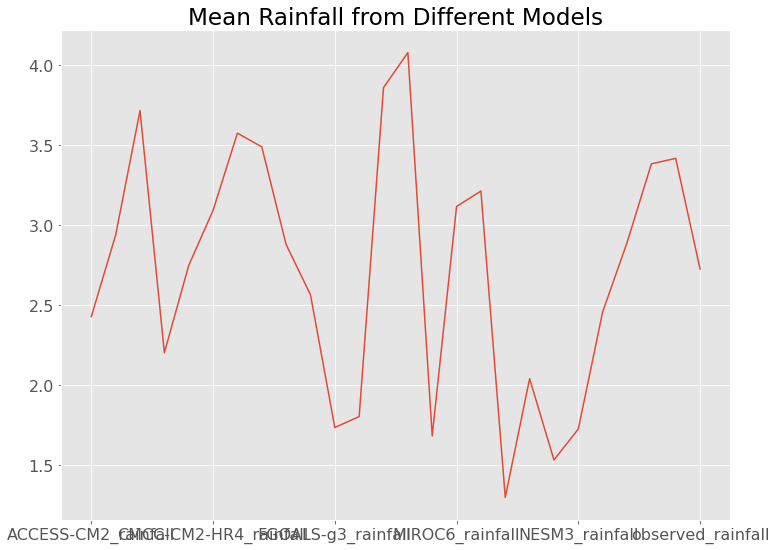

In [18]:
# EDA
X_train_mean = train_df.mean(axis=0)
X_train_mean.plot(figsize=(12, 9), title="Mean Rainfall from Different Models");

In [7]:
X_train = train_df.drop(columns=["observed_rainfall"])
y_train = train_df["observed_rainfall"]
X_test = test_df.drop(columns=["observed_rainfall"])
y_test = test_df["observed_rainfall"]

# fit training set
rf_model = RandomForestRegressor(random_state=25)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=25)

In [8]:
# predict on test set
y_predict = rf_model.predict(X_test)
print(y_predict)

[6.62468336 3.16090269 2.69780884 ... 7.40938701 8.94425498 5.37357003]


In [9]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
rmse

8.839062084107871

In [10]:
# Calculate RMSE of other models
rmse_models = []
for c in X_test.columns:
    rmse_models.append(np.sqrt(mean_squared_error(y_test, X_test[c])))
rmse_models

[11.03899918385165,
 10.695305350555104,
 10.996615645823058,
 10.761381439070494,
 10.61557814309429,
 10.643203823048916,
 11.480614439621686,
 11.246493184224887,
 11.151317797663006,
 10.453606322852785,
 9.687787801590718,
 10.5116821515291,
 11.451635236712267,
 12.25022302545882,
 9.600479601763467,
 11.352975765167592,
 10.932004152106803,
 9.96982272985151,
 10.260886028100495,
 9.92279490286555,
 9.978136636933371,
 10.410145010506907,
 10.93973997074141,
 11.67874913000331,
 11.528083110392053]

### Discussion
Yes, the RMSE of the ensemble model is smaller than all the individual models and thus we have a better result from the ensemble model.

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete task 4 from the milestone3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the task 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [14]:
model = RandomForestRegressor(random_state=25, n_estimators=50, max_depth=5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=25)

In [15]:
print(
    f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}"
)
print(
    f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}"
)

Train RMSE: 7.90
 Test RMSE: 8.66


In [16]:
# ready to deploy
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).***